In [ ]:
"""
Training GMM w/ background data
"""

import os
import pickle
import numpy as np
from tqdm import tqdm
import skimage.measure
from sklearn.mixture import GaussianMixture
from skimage.measure import label
from PIL import Image
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

downsampleSize = 2
skipAmount = 4
nComponents = 5
folderList = ['dataset/Crowd_PETS09/S0/Background/View_001/Time_13-06',
              'dataset/Crowd_PETS09/S0/Background/View_001/Time_13-32']

# ref = Image.open(folderList[0] + '/' + os.listdir(folderList[0])[0])
trainingData = [] # np.zeros(np.array(ref.convert('L')).shape)

for folder in folderList:
    for i, file in enumerate(os.listdir(folder)):
        if i % skipAmount == 0:
            img = Image.open(folder + '/' + file)
            img = np.array(img.convert('L')) # grayscale
            img = skimage.measure.block_reduce(img, downsampleSize, np.mean) # downsample
            trainingData.append(img)
trainingData = np.array(trainingData)

# N = np.arange(1, 6)
mixtureModels = []
for i in tqdm(range(trainingData.shape[1])):
    temp = []
    for j in range(trainingData.shape[2]):
        pixelValues = trainingData[:, i, j]
        # models = [None for j in range(len(N))]

        # for k in range(len(N)):
        #     models[k] = GaussianMixture(n_components=N[k]).fit(pixelValues.reshape(-1, 1))
        # AIC = [m.aic(pixelValues.reshape(-1, 1)) for m in models]
        # temp.append(models[np.argmin(AIC)])
        temp.append(GaussianMixture(n_components=nComponents).fit(pixelValues.reshape(-1, 1)))
    mixtureModels.append(temp)

with open('methods/baseline-indirect/GMM.pkl', 'wb') as f:
    pickle.dump(mixtureModels, f)

In [ ]:
"""
Eval
"""

img = Image.open('dataset/Crowd_PETS09/S0/Regular_Flow/Time_13-57/View_001/frame_0018.jpg')
img = np.array(img.convert('L')) # grayscale
output = np.zeros(img.shape)
for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
        model = mixtureModels[int(i / 2)][int(j / 2)]
        output[i, j] = model.score_samples(img[i, j].reshape(-1, 1))[0]

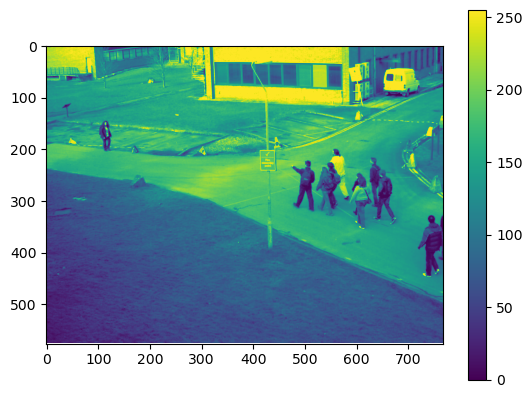

12846


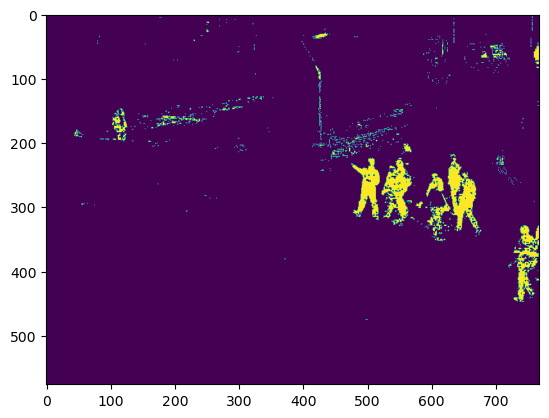

653


In [57]:
"""
Visualization
"""

thresh = -200
print(f'Pixels under threshold: {np.sum(temp < thresh)}')

view = np.copy(output)
t1 = np.where(view < thresh)
t2 = np.where(view >= thresh)
view[t1] = 255
view[t2] = 0

plt.imshow(img)
plt.colorbar()
plt.show()

plt.imshow(view)
plt.show()

countComponents = label(view)
print(f'Number of people: {np.max(countComponents)}')

TODO: 
1) create slider for threshold, faster to test
2) try cleaning result with dilation/erosion from hw2
3) try cleaning result with gaussian blur from hw3